In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,load_iris, load_digits

 

iris_data = load_iris()
iris_x = iris_data.data  
iris_y = iris_data.target  
iris_x_frame = pd.DataFrame(iris_x, columns=iris_data.feature_names)
iris_features = iris_data.feature_names 
iris_classes = iris_data.target_names 

digits_data = load_digits()
digits_x = digits_data.data  
digits_y = digits_data.target  
digits_x_frame = pd.DataFrame(digits_x, columns=digits_data.feature_names)
digits_features = digits_data.feature_names 
digits_classes = digits_data.target_names 

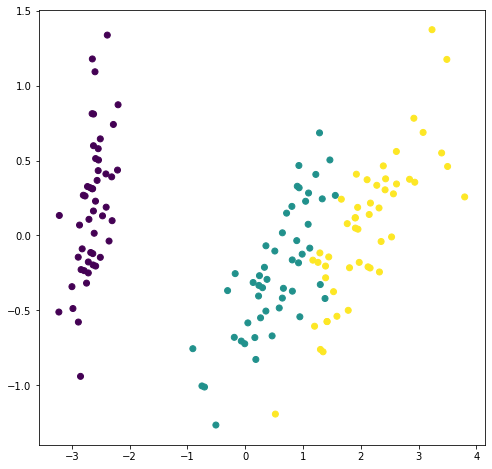

In [32]:
from sklearn.decomposition import PCA

pca_iris = PCA(2) 
iris_x_pca = pca_iris.fit_transform(iris_x)
plt.figure(figsize=(8, 8))
plt.scatter(iris_x_pca[:, 0], iris_x_pca[:, 1], c=iris_y)

Text(0.5, 1.0, 'digits 2 dimensional plot')

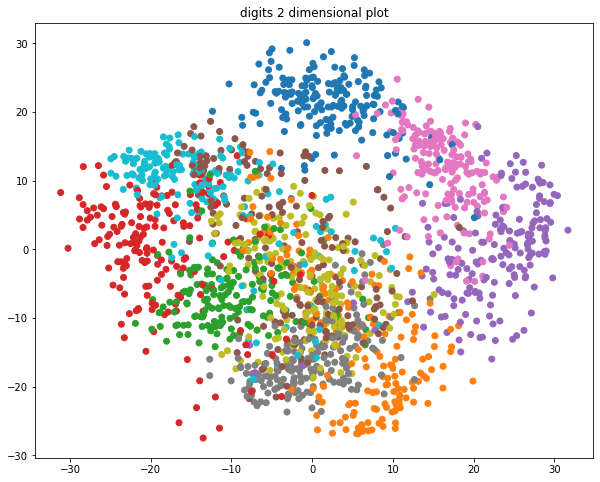

In [33]:
pca_digits= PCA(2) 
digits_x_pca = pca_iris.fit_transform(digits_x)
plt.figure(figsize=(10, 8))
plt.scatter(digits_x_pca[:, 0], digits_x_pca[:, 1], c=digits_y, cmap='tab10')
plt.title("digits 2 dimensional plot")

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=4)
labels = dbscan.fit_predict(iris_x)
unique_labels = np.unique(labels)
print(unique_labels)

outlier = 0

for i in range(len(labels)):
    if labels[i]==-1:
        outlier=outlier+1


print(f"clusters : {len(unique_labels)}")
print(f"outliers: {outlier}")



[-1  0  1  2]
clusters : 4
outliers: 5


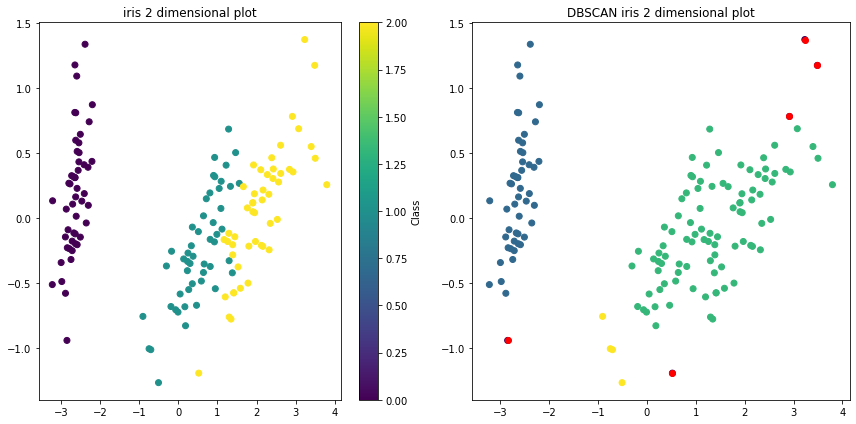

In [35]:
from sklearn.decomposition import PCA

pca_iris = PCA(2) 
iris_x_pca = pca_iris.fit_transform(iris_x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(iris_x_pca[:, 0], iris_x_pca[:, 1], c=iris_y)
plt.title("iris 2 dimensional plot")
plt.colorbar(label="Class")


plt.subplot(1, 2, 2)
plt.scatter(iris_x_pca[:, 0], iris_x_pca[:, 1], c=labels)
plt.scatter(iris_x_pca[labels == -1, 0], iris_x_pca[labels == -1, 1], color='red')
plt.title("DBSCAN iris 2 dimensional plot")
plt.tight_layout()
plt.show()

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np


dbscan = DBSCAN(eps=24, min_samples=10)
labels_digits = dbscan.fit_predict(digits_x)
unique_labels_g = np.unique(labels_digits)
print(unique_labels_g)

outlier = 0

for i in range(len(labels_digits)):
    if labels_digits[i]==-1:
        outlier=outlier+1


print(f"clusters : {len(unique_labels_g)}")
print(f"outliers: {outlier}")


[-1  0  1  2  3  4  5  6  7  8  9]
clusters : 11
outliers: 201


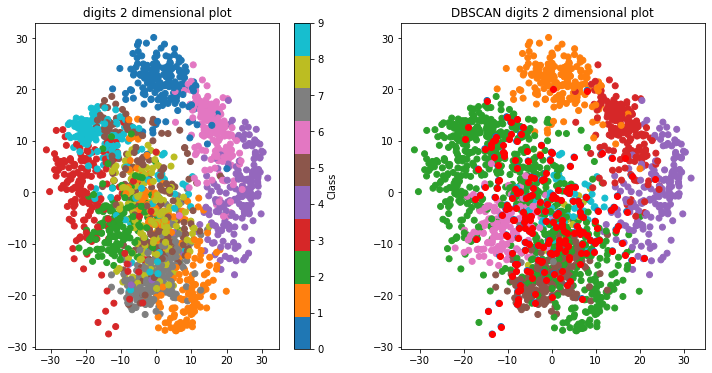

In [37]:
from sklearn.decomposition import PCA

pca_digits = PCA(2) 
digits_x_pca = pca_digits.fit_transform(digits_x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(digits_x_pca[:, 0], digits_x_pca[:, 1], c=digits_y,cmap='tab10')
plt.title("digits 2 dimensional plot")
plt.colorbar(label="Class")


plt.subplot(1, 2, 2)
plt.scatter(digits_x_pca[:, 0], digits_x_pca[:, 1], c=labels_digits,cmap='tab10')
plt.scatter(digits_x_pca[labels_digits == -1, 0], digits_x_pca[labels_digits == -1, 1], color='red')
plt.title("DBSCAN digits 2 dimensional plot")


plt.show()

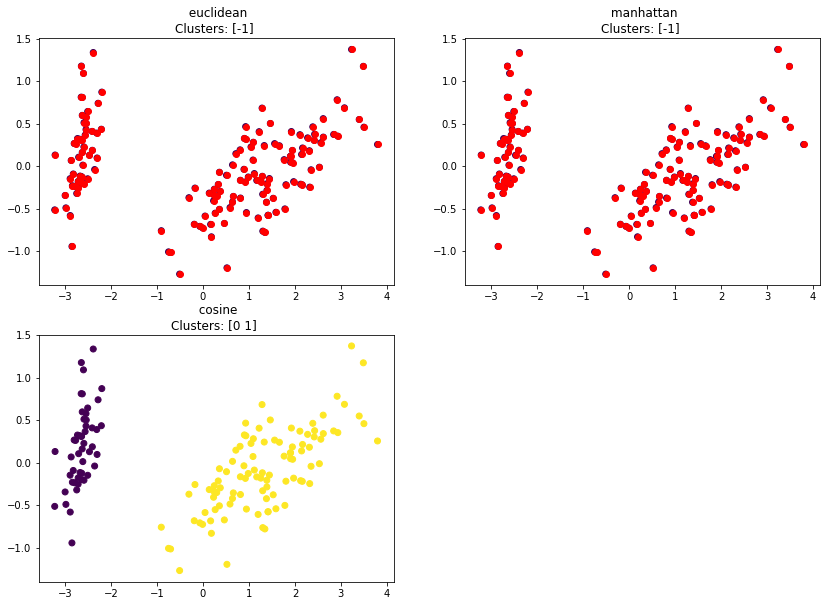

In [38]:
metrics = ['euclidean', 'manhattan', 'cosine']

plt.figure(figsize=(14, 10))

index = 1

for metric in metrics:
    dbscan = DBSCAN(eps=0.005, min_samples=6, metric=metric)
    labels = dbscan.fit_predict(iris_x)

    unique_labels = np.unique(labels)

    plt.subplot(2, 2, index)
    index =index + 1
    plt.scatter(iris_x_pca[:, 0], iris_x_pca[:, 1], c=labels)
    plt.scatter(iris_x_pca[labels == -1, 0], iris_x_pca[labels == -1, 1], color='red')
    plt.title(f" {metric}\nClusters: {unique_labels} ")
    

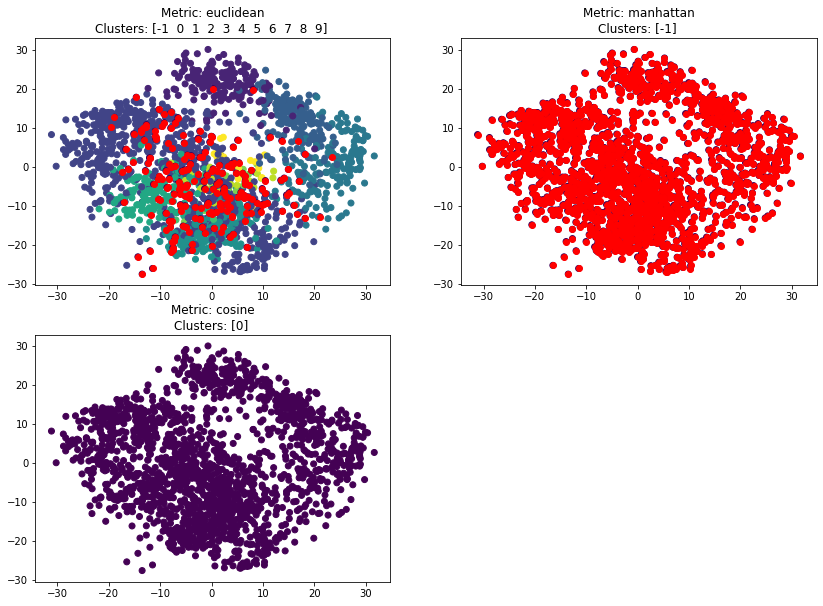

In [39]:
metrics = ['euclidean', 'manhattan', 'cosine']

plt.figure(figsize=(14, 10))

index = 1

for metric in metrics:
    dbscan = DBSCAN(eps=24, min_samples=10, metric=metric)
    labels = dbscan.fit_predict(digits_x)

    unique_labels = np.unique(labels)

    plt.subplot(2, 2, index)
    index =index + 1
    plt.scatter(digits_x_pca[:, 0], digits_x_pca[:, 1], c=labels)
    plt.scatter(digits_x_pca[labels == -1, 0], digits_x_pca[labels == -1, 1], color='red')
    plt.title(f"Metric: {metric}\nClusters: {unique_labels} ")
    